# DSR 20 - Backprop course

## 1. perceptron and the delta rule

#### Perceptron training:
1. Initialize weights vector with small random numbers
2. Repeat until convergence:
    Loop over feature vector (𝑥j) and labels (li) in training set D.
    Take 𝑥 and pass it through the perceptron, calculating the output values: 
    $$ y_{j}=w(t)\cdot x_{j}=ƒ(w(t)ᐧx_{j})$$
    Update weights: 
    $$ w_{i}(t+1)=w_{i}(t)+𝛼(l_{j}-y_{j})$$  
    for all 0 <= i < n
3. Terminate criterion

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
class Perceptron:
    # N is the length of are input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N ) / np.sqrt(N)
        self.N = N
        self.alpha = alpha
        
        
    def step(self, x):
        # apply a step activation function
        return 1 if x > 0 else 0
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
            
        # loop over the desired number of epochs
        w = self.W
       
        for epoch in np.arange(0, epochs):
        # loop over each individual data point
            for (x, target) in zip(X, y):
            # take the dot product between the input features
            # and the weight matrix, then pass this value
            # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # perform weight update if prediction
                # does not match trget
                if p != target:
                    # calculate delta
                    delta = p - target
                    # update the weight matrix
                    self.W += -self.alpha * delta * x
                    w = np.append(w,[self.W])
                   
        return w
    
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        return self.step(np.dot(X, self.W))
    

In [3]:
# construct the OR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [1]])

# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=20,addBias=False)

training perceptron...


In [4]:
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=False)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))

testing perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=1
data=[1 1], true_label=1, pred=1


# save the weights during training and plot 

weights are:  [0.15880121 0.31533239]


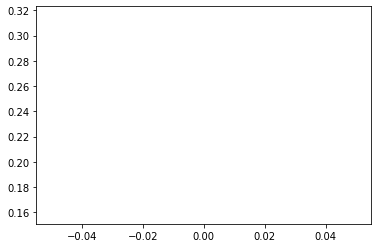

In [5]:
print ("weights are: ", w)
for i in range(2):
    plt.plot(w[i:len(w):2])

# Repeat now with bias (addBias=True), what happend to the weights?

In [6]:
p = Perceptron(X.shape[1], alpha=0.1)
w=p.fit(X, y, epochs=20,addBias=True)
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
    
print ("weights are: ", w)

True
testing perceptron...
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=1
data=[1 1], true_label=1, pred=1
weights are:  [ 0.56690969  0.32913206  0.00171629  0.56690969  0.32913206  0.00171629
  0.56690969  0.32913206 -0.09828371]


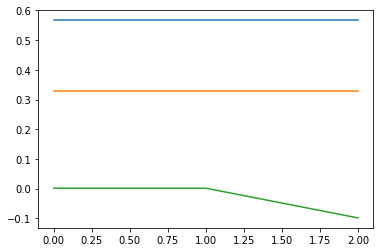

In [7]:
for i in range(3):
    plt.plot(w[i:len(w):3])

## change the learning rate how are the weights changing now?

True
testing perceptron...
data=[0 0], true_label=0, pred=1
data=[0 1], true_label=1, pred=1
data=[1 0], true_label=1, pred=1
data=[1 1], true_label=1, pred=1
weights are:  [-1.11522408  0.83062775  1.15794855 -1.11522408  0.83062775  1.15794855
 -1.11522408  0.83062775  1.14794855 -1.11522408  0.83062775  1.13794855
 -1.11522408  0.83062775  1.12794855 -1.11522408  0.83062775  1.11794855
 -1.11522408  0.83062775  1.10794855 -1.10522408  0.83062775  1.11794855
 -1.10522408  0.83062775  1.10794855 -1.10522408  0.83062775  1.09794855
 -1.09522408  0.83062775  1.10794855 -1.09522408  0.83062775  1.09794855
 -1.09522408  0.83062775  1.08794855 -1.08522408  0.83062775  1.09794855
 -1.08522408  0.83062775  1.08794855 -1.08522408  0.83062775  1.07794855
 -1.07522408  0.83062775  1.08794855 -1.07522408  0.83062775  1.07794855
 -1.07522408  0.83062775  1.06794855 -1.06522408  0.83062775  1.07794855
 -1.06522408  0.83062775  1.06794855 -1.06522408  0.83062775  1.05794855
 -1.05522408  0.83062775

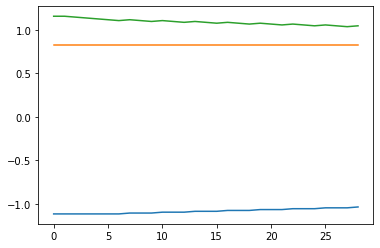

In [8]:
p = Perceptron(X.shape[1], alpha=0.01)
w = p.fit(X, y, epochs=20,addBias=True)
# now that our perceptron is trained we can evaluate it
print("testing perceptron...")

# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))
    
    
print ("weights are: ", w)
for i in range(3):
    plt.plot(w[i:len(w):3])

### 1. Repeat all steps for an AND data set
### 2. Repeat all steps for a XOR data set


In [9]:
# construct the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [0], [0], [1]])

In [10]:
# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=20,addBias=True)
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))

training perceptron...
True
data=[0 0], true_label=0, pred=0
data=[0 1], true_label=0, pred=0
data=[1 0], true_label=0, pred=0
data=[1 1], true_label=1, pred=1


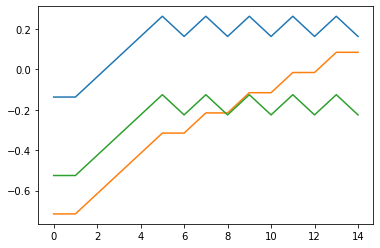

In [11]:
for i in range(3):
    plt.plot(w[i:len(w):3])

In [12]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [13]:
# define our perceptron and train it
print("training perceptron...")
p = Perceptron(X.shape[1], alpha=0.1)
w = p.fit(X, y, epochs=20,addBias=True)
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    print("data={}, true_label={}, pred={}".format(
        x, target[0], pred))

training perceptron...
True
data=[0 0], true_label=0, pred=1
data=[0 1], true_label=1, pred=0
data=[1 0], true_label=1, pred=0
data=[1 1], true_label=0, pred=0


### Perceptron for a regression problem

In [26]:
X = np.arange (0,100,1)
noise = np.random.normal(loc=0.0, scale=5, size=100)
y = 70 + 1.2*X + noise

# normalization of inputs and lables 
y=y/np.max(X)
X=X/np.max(X)

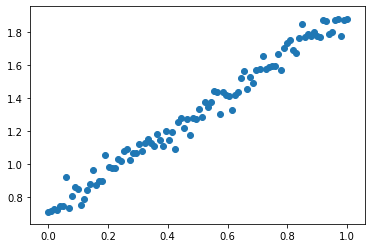

In [27]:
plt.scatter(X, y)

#### How should you change the activation function to fit a regression problem???

In [28]:
# implement the perceptron class here for regression

class Perceptron:
    # N is the length of are input feature 
    # alpha learning rate
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N ) / np.sqrt(N)
        self.N = N
        self.alpha = alpha
        
        
    def step(self, x):
        # apply a linear activation
        return x if x > 0 else 0
    
    def fit(self, X, y, epochs=10, addBias=True):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        if addBias:
            print(addBias)
            X = np.c_[X, np.ones((X.shape[0]))]
            self.W = np.random.randn(self.N+1) / np.sqrt(self.N)
            
        # loop over the desired number of epochs
        w = self.W
       
        for epoch in np.arange(0, epochs):
        # loop over each individual data point
            for (x, target) in zip(X, y):
            # take the dot product between the input features
            # and the weight matrix, then pass this value
            # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))
                # perform weight update if prediction
                # does not match trget
                #if p != target:
                    # calculate delta
                delta = p - target
                    # update the weight matrix
                self.W += -self.alpha * delta * x
            w = np.append(w,[self.W])
                   
        return w
    
    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)
        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]
            # take the dot product between the input features and the
            # weight matrix, then pass the value through the step
            # function
        return self.step(np.dot(X, self.W))

In [29]:
# define our perceptron and train it
print("training perceptron...")
p = Perceptron(1, alpha=0.01)
w = p.fit(X, y, epochs=100,addBias=True)
prediction = []
# now that our network is trained, loop over the data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = p.predict(x,addBias=True)
    prediction=np.append(prediction,pred)
    print("data={}, true_label={}, pred={}".format(
        x, target, pred))

training perceptron...
True
data=0.0, true_label=0.7095634638820691, pred=[0.7101539]
data=0.010101010101010102, true_label=0.7105232591371016, pred=[0.72229574]
data=0.020202020202020204, true_label=0.7277473619960851, pred=[0.73443757]
data=0.030303030303030304, true_label=0.7219247225854463, pred=[0.7465794]
data=0.04040404040404041, true_label=0.7469273095691455, pred=[0.75872123]
data=0.050505050505050504, true_label=0.745720633538881, pred=[0.77086307]
data=0.06060606060606061, true_label=0.9191554228867373, pred=[0.7830049]
data=0.0707070707070707, true_label=0.7343356191417139, pred=[0.79514673]
data=0.08080808080808081, true_label=0.8022955339942364, pred=[0.80728856]
data=0.09090909090909091, true_label=0.8564757164797131, pred=[0.8194304]
data=0.10101010101010101, true_label=0.8499725423482668, pred=[0.83157223]
data=0.1111111111111111, true_label=0.7476514678313684, pred=[0.84371406]
data=0.12121212121212122, true_label=0.7836348067936196, pred=[0.85585589]
data=0.131313131

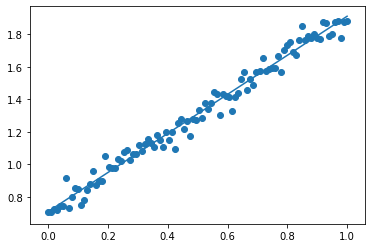

In [30]:
plt.scatter(X,y)
plt.plot(X,prediction)

In [31]:
len(w)

202

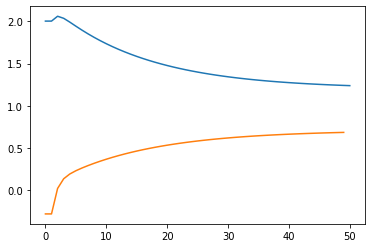

In [32]:
plt.plot(w[0:101:2])
plt.plot(w[1:101:2])


### 1.  repeat the training without bias (addBias = False) , what happend?
### 2.  repeat the training without the normalization of the data, what happend?